Shibu Mohapatra

Artificial Intelligence

**Apply PCA on the MNIST dataset. (Use the sci-kit learn library or try writing PCA yourself).**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
   
df = pd.read_csv('/content/drive/MyDrive/mnist_train.csv', nrows = 20000)

print("the shape of data is :", df.shape)
df.head()

the shape of data is : (20000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


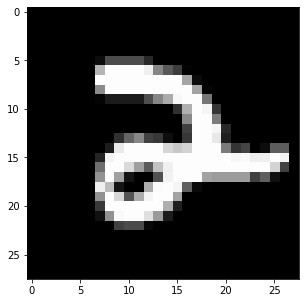

2


In [8]:
label = df['label']
df.drop('label', axis = 1, inplace = True)
ind = np.random.randint(0, 20000)
plt.figure(figsize = (20, 5))
grid_data = np.array(df.iloc[ind]).reshape(28,28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()
print(label[ind])

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
std_df.shape

(20000, 784)

In [10]:
covar_mat = np.matmul(std_df.T, std_df)
covar_mat.shape

(784, 784)

In [11]:
from scipy.linalg import eigh
values, vectors = eigh(covar_mat, eigvals = (782, 783))
print("Dimensions of Eigen vector:", vectors.shape)
vectors = vectors.T
print("Dimensions of Eigen vector:", vectors.shape)

Dimensions of Eigen vector: (784, 2)
Dimensions of Eigen vector: (2, 784)


In [12]:
final_df = np.matmul(vectors, std_df.T)
print("vectros:", vectors.shape, "\n", "std_df:", std_df.T.shape, "\n", "final_df:", final_df.shape)

vectros: (2, 784) 
 std_df: (784, 20000) 
 final_df: (2, 20000)


In [13]:
final_dfT = np.vstack((final_df, label)).T
dataFrame = pd.DataFrame(final_dfT, columns = ['pca_1', 'pca_2', 'label'])
dataFrame

,pca_1,pca_2,label
0,5.430697,5.060862,1.0
1,-6.242999,-19.293148,0.0
2,1.828611,7.684498,1.0
3,-5.585495,0.440132,4.0
4,-6.333250,-26.597773,0.0
...,...,...,...
19995,-8.883210,-7.373862,9.0
19996,-4.603450,1.685284,9.0
19997,5.469740,0.084802,6.0
19998,-16.308297,-2.961823,8.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


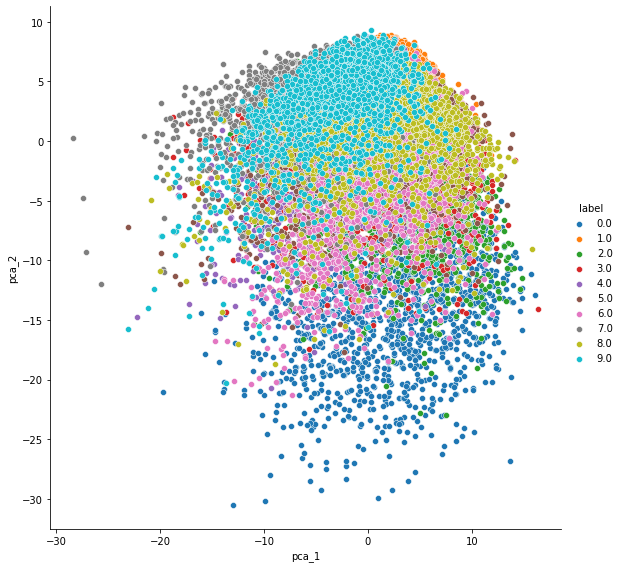

In [14]:
sns.FacetGrid(dataFrame, hue = 'label', size = 8).map(sns.scatterplot, 'pca_1', 'pca_2').add_legend()
plt.show()